Take a look data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df = pd.concat([train_df,test_df])
df.shape

(2919, 81)

In [6]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
missing=df.isnull().sum()
missing=missing[missing>0]
missing_percent=(missing/df.shape[0])*100
missing_percent.sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

In [11]:
df.isna().any()
print('Sum of nulls:')
df.isna().sum()

Sum of nulls:


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

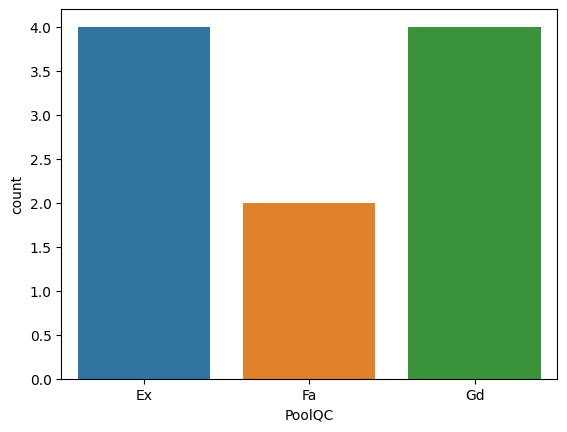

In [13]:
df_mvi=df.copy()
sns.countplot(x=df_mvi['PoolQC'])
plt.show()

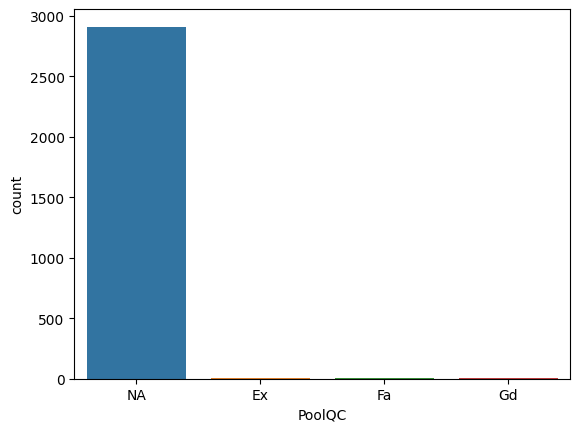

In [14]:
pool_Const="NA" 
df_mvi['PoolQC'].replace(np.nan,pool_Const,inplace=True)
sns.countplot(x=df_mvi['PoolQC'])
plt.show()

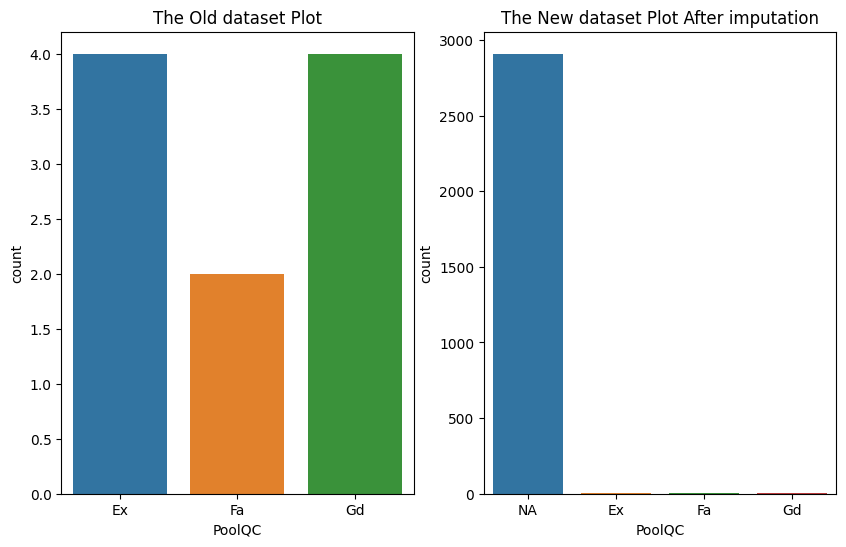

In [15]:
def beforeAfterCountPlot(feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.countplot(x=feature,data=df)
    plt.title('The Old dataset Plot')
    plt.subplot(1,2,2)
    sns.countplot(x=feature,data=df_mvi)
    plt.title('The New dataset Plot After imputation')
    plt.show()
beforeAfterCountPlot('PoolQC')  

In [16]:
df_mvi.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

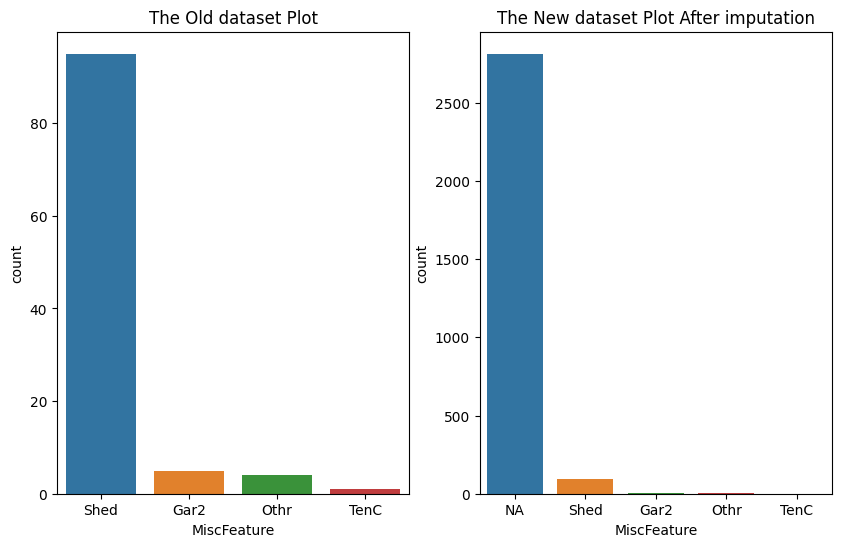

In [17]:
miscFeature_const='NA' #Through Data Description 
df_mvi['MiscFeature'].replace(np.nan,miscFeature_const,inplace=True)
beforeAfterCountPlot('MiscFeature')

In [18]:
df_mvi['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

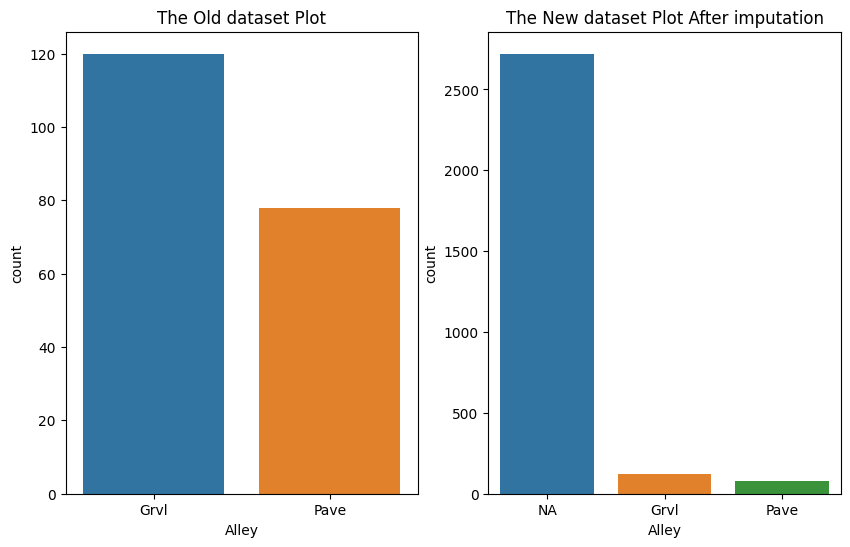

In [19]:
alley_const='NA'
df_mvi['Alley'].replace(np.nan,alley_const,inplace=True)
beforeAfterCountPlot('Alley')

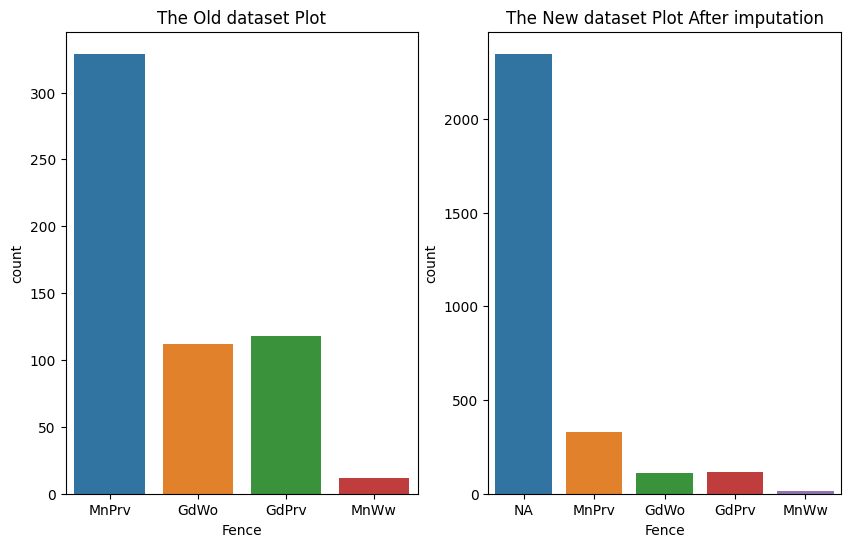

In [20]:
fence_const='NA'
df_mvi['Fence'].replace(np.nan,fence_const,inplace=True)
beforeAfterCountPlot('Fence')

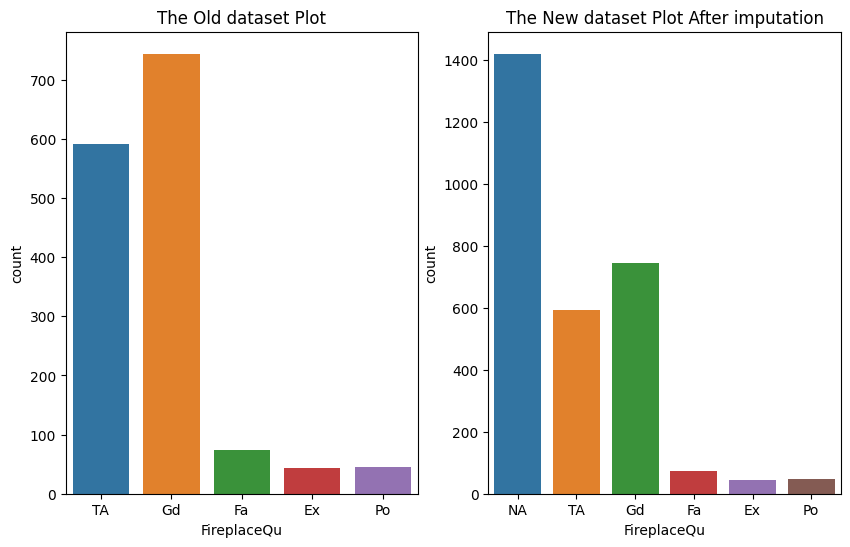

In [21]:
FireplaceQu_const='NA'
df_mvi['FireplaceQu'].replace(np.nan,FireplaceQu_const,inplace=True)
beforeAfterCountPlot('FireplaceQu')

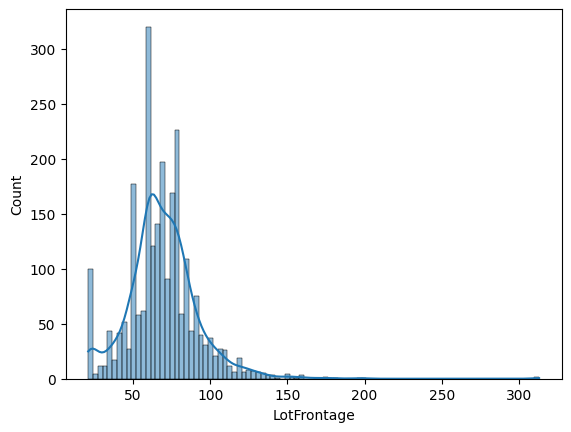

In [22]:
sns.histplot(df_mvi['LotFrontage'],kde=True)
plt.show()

In [23]:
lotfrontage_mean=df_mvi['LotFrontage'].mean() # Filling the missing values with mean
df_mvi['LotFrontage'].replace(np.nan,lotfrontage_mean,inplace=True)

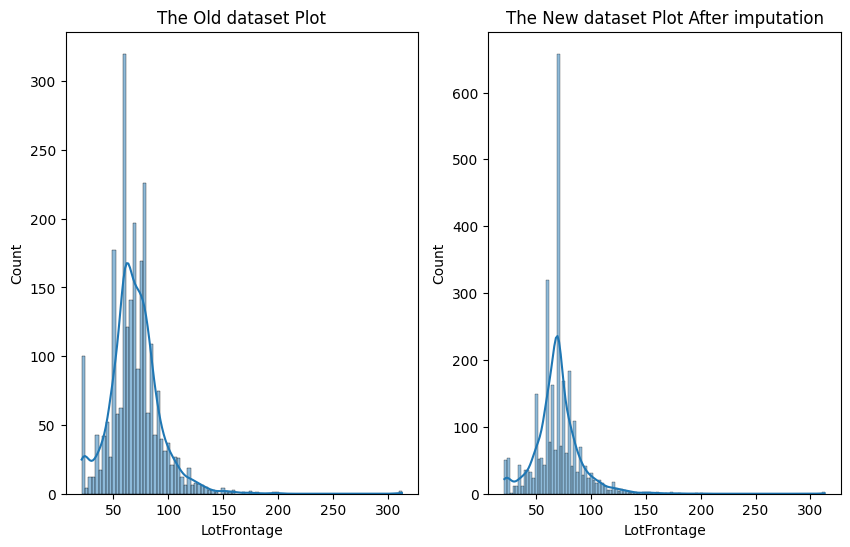

In [24]:
def histBeAfter(feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title('The Old dataset Plot')
    plt.subplot(1,2,2)
    sns.histplot(df_mvi[feature],kde=True)
    plt.title('The New dataset Plot After imputation')
    plt.show()
histBeAfter('LotFrontage')

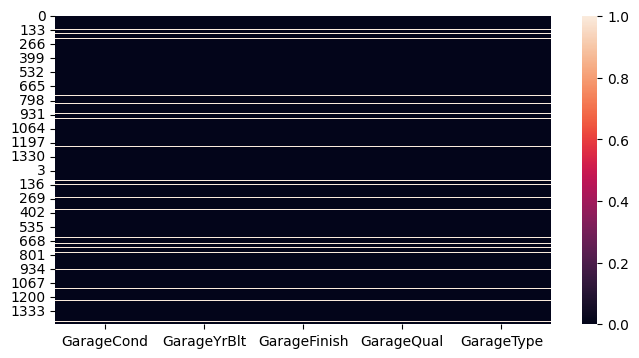

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['GarageCond','GarageYrBlt','GarageFinish','GarageQual','GarageType']].isnull())
#Draw the heat to see if there is any pattern of missing values
plt.show()

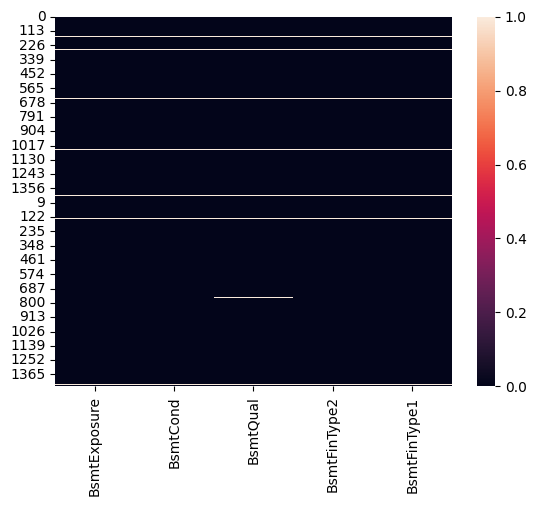

In [26]:
gyearConst=0 #since there is pattern ,so garegefinish is null , so there will be no yearOf built
df_mvi['GarageYrBlt'].replace(np.nan,gyearConst,inplace=True)


garage_const='NA' #keep in mind data description
garage_variables=['GarageCond','GarageFinish','GarageQual','GarageType']
for var in garage_variables:
    df_mvi[var].replace(np.nan,garage_const,inplace=True)

sns.heatmap(df_mvi[['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']].isnull())
plt.show()

In [27]:
bsment_var=['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']
bsment_const='NA'
for var in bsment_var:
    df_mvi[var].replace(np.nan,bsment_const,inplace=True)

In [28]:
features_with_mode=[ 'MasVnrType', 'MasVnrArea', 'MSZoning',
       'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities',
       'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars', 'GarageArea',
       'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st',
       'Electrical']

In [29]:
for fear in features_with_mode:
    mode=df_mvi[fear].mode()[0]
    df_mvi[fear].replace(np.nan,mode,inplace=True)

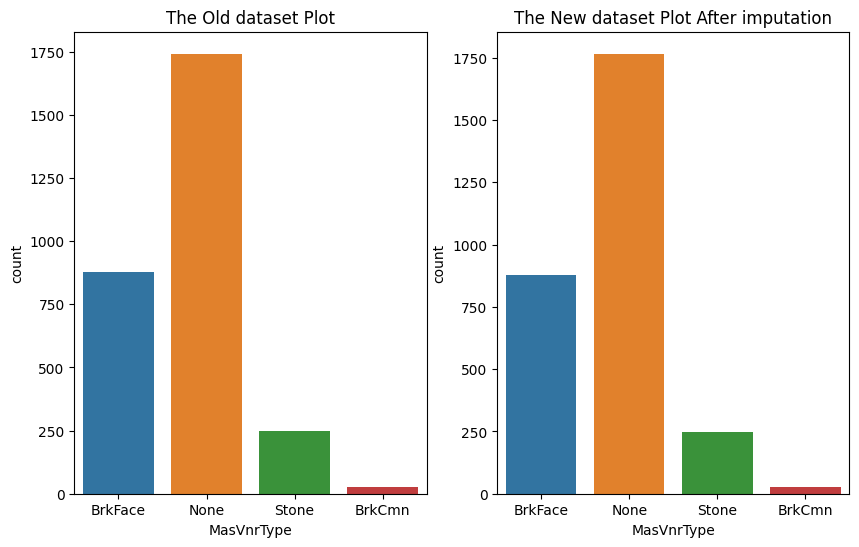

In [30]:
df_mvi.isnull().sum()

beforeAfterCountPlot('MasVnrType')

In [31]:
df_mvi=df_mvi.set_index('Id')

df_mvi.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


In [33]:
import calendar
df_mvi['MoSold'] 
df_mvi['MoSold']=df_mvi['MoSold'].apply(lambda x: calendar.month_abbr[x])
df_mvi['MoSold']

Id
1       Feb
2       May
3       Sep
4       Feb
5       Dec
       ... 
2915    Jun
2916    Apr
2917    Sep
2918    Jul
2919    Nov
Name: MoSold, Length: 2919, dtype: object

In [34]:
from pandas.api.types import CategoricalDtype

In [35]:
df_mvi['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [36]:
cat_ls=['FireplaceQu','GarageQual','GarageCond','KitchenQual','HeatingQC','BsmtCond','BsmtQual','ExterCond','ExterQual']
# This is list of those feature having similar categories in their columns
categories=['NA','Po','Fa','TA','Gd','Ex']

In [37]:
for c in cat_ls:
    df_mvi[c]=df_mvi[c].astype(CategoricalDtype(categories=categories,ordered=True)).cat.codes

In [38]:
df_mvi['FireplaceQu']
z

Id
1       0
2       3
3       3
4       4
5       3
       ..
2915    0
2916    0
2917    3
2918    0
2919    3
Name: FireplaceQu, Length: 2919, dtype: int8

In [39]:
df_mvi['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [40]:
df_mvi['BsmtExposure']=df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes

In [41]:
df_mvi['Utilities']=df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True)).cat.codes

df_mvi['BsmtFinType1']=df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_mvi['BsmtFinType2']=df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes

object_feature=df_mvi.select_dtypes('object').columns.tolist()
object_feature

df_encod=df_mvi.copy()
df_encod=pd.get_dummies(df_encod,columns=object_feature,prefix=object_feature,drop_first=True)

print(df_encod.shape)
print(df_mvi.shape)

(2919, 229)
(2919, 80)


In [42]:
X_train=df_encod[:len(train_df)].drop('SalePrice',axis=1)
Y_train=df_encod['SalePrice'][:1460]
X_test=df_encod[len(train_df):].drop('SalePrice',axis=1)

C:\Users\prodr\AppData\Local\Temp\ipykernel_9508\83091036.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_train=df_encod['SalePrice'][:1460]


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
from sklearn.model_selection import cross_val_score

In [44]:
dtRegressor=DecisionTreeRegressor()
gbRegressor=GradientBoostingRegressor()
rfRegressor=RandomForestRegressor()
knRegressor=KNeighborsRegressor()
xgb=xgboost.XGBRegressor()

In [45]:
models={
    'a':['DecisionTreeRegressor', dtRegressor],
    'b':['GradientBoostingRegressor', gbRegressor],
    'c':['RandomForestRegessor',rfRegressor],
    'd':['KNeighborsRegressor',knRegressor],
    'e':['xgboost',xgb]
}

In [46]:
model_score=[]
for model in models:
    print ('Training the model :',  models[model][0])
    score=cross_val_score(models[model][1],X_train,Y_train,cv=5)
    print('Model score is :', score.mean())
    model_score.append([models[model][0], score.mean()])
    

Training the model : DecisionTreeRegressor
Model score is : 0.7243870914850608
Training the model : GradientBoostingRegressor
Model score is : 0.8912092132632908
Training the model : RandomForestRegessor
Model score is : 0.8596461068295718
Training the model : KNeighborsRegressor
Model score is : 0.6483270887149887
Training the model : xgboost
Model score is : 0.8618204242966678


In [47]:
gbRegressor=GradientBoostingRegressor()